In [60]:
pip install ipdb

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install selenium pandas numpy beautifulsoup4 matplotlib scikit-learn plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 1.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 778.1 kB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import ipdb

In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://isasurf.org/event/paris-2024/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

section = soup.find_all('section', class_='big-blocks')

relative_divs = section[2].find_all('div', class_='uk-position-relative')
temp = section[2].find_all('ul', class_='uk-slider-items')
men = temp[0].find_all('div', class_='uk-card-body')
women = temp[1].find_all('div', class_= 'uk-card-body')

men_names = []
women_names = []
for man in men:
  nombre = man.find('strong')
  name = nombre.get_text(strip=True)
  p_tag = man.find('p')  
  country = p_tag.get_text(strip=True)
  men_names.append({'name': name , 'country': country})
  
for woman in women:
  nombre = woman.find('strong')
  name = nombre.get_text(strip=True)
  p_tag = woman.find('p')  
  country = p_tag.get_text(strip=True)
  women_names.append({'name': name , 'country': country})
  
    
men_df = pd.DataFrame(men_names)
women_df = pd.DataFrame(women_names)
print(women_df)


                         name       country
0              Caroline Marks           USA
1               Carissa Moore           USA
2                Tyler Wright     Australia
3               Molly Picklum     Australia
4         Tatiana Weston-Webb        Brazil
5               Johanne Defay        France
6              Brissa Hennesy    Costa Rica
7             Teresa Bonvalot      Portugal
8               Vahine Fierro        France
9               Shino Matsuda         Japan
10                 Sarah Baum  South Africa
11                Saffi Vette   New Zealand
12         Sanoa Dempfle-Olin        Canada
13                Sol Aguirre          Peru
14              Tainá Hinckel        Brazil
15            Yolanda Hopkins      Portugal
16  Janire Gonzalez-Etxabarri         Spain
17               Camilla Kemp       Germany
18                  Siqi Yang         China
19            Nadia Erostarbe         Spain
20                Anat Lelior        Israel
21            Caitlin Simmers   

In [42]:
print(men_df)

                  name       country
0        Filipe Toledo        Brazil
1    Griffin Colapinto           USA
2          Ethan Ewing     Australia
3         João Chianca        Brazil
4        Jack Robinson     Australia
5   John John Florence           USA
6       Leo Fioravanti         Italy
7       Kanoa Igarashi         Japan
8          Jordy Smith  South Africa
9     Matt McGillivray  South Africa
10        Alan Cleland        Mexico
11         Kauli Vaast        France
12           Reo Inaba         Japan
13     Billy Stairmand   New Zealand
14       Lucca Mesinas          Peru
15       Alonso Correa          Peru
16           Tim Elter       Germany
17           Rio Waida     Indonesia
18         Andy Criere         Spain
19      Ramzi Boukhiam       Morocco
20      Gabriel Medina        Brazil
21         Bryan Perez   El Salvador


#### Extract rankings

In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.safari.options import Options
import pandas as pd


options = Options()
options.headless = True
driver = webdriver.Safari(options=options)

base_urls = {year: f'https://www.worldsurfleague.com/athletes/tour/mct?year={year}' for year in range(2010, 2025)}

def scrape_data(url, year):
    driver.get(url)
    results = []

    try:
        headers = driver.find_elements(By.CSS_SELECTOR, 'table thead th')
        columns = []
        for header in headers:
            header_text = header.text.strip()
            if header.text.strip() != '' and header.text.strip() != 'Points from each tour event' and header.text.strip() != 'WSL Finals' and header.text.strip() != 'In Progress' and header.text.strip() != '(Live)':
                if 'athlete-event-place' in header.get_attribute('class'):
                    tooltip = header.find_element(By.CSS_SELECTOR, 'span.tooltip-item')
                    competition_name = tooltip.get_attribute('data-tooltip').split('>')[1].split('<')[0]
                    if(year <= 2022):
                        competition_name = tooltip.get_attribute('data-tooltip').split('>')[2].split('<')[0]
                        
                    columns.append(competition_name)
                else:
                    columns.append(header_text)

        print(f"Year {year} - Columns: {columns}")

        rows = driver.find_elements(By.CSS_SELECTOR, 'table tbody tr')
        # olympics = False
        count = 1
        for row in rows:
            if 'insertedathlete-553 mid-cut-off-row' in row.get_attribute('class') or 'insertedathlete-3442 cut-off-row tour-mct' in row.get_attribute('class'):
                continue

            cells = row.find_elements(By.CSS_SELECTOR, 'td')
            filtered_cells = []

            
            # for cell in cells:
            #     a = cell.find_elements(By.CSS_SELECTOR, 'span.athlete-qualified-frame')
            #     if a:# or cell.find_elements(By.CSS_SELECTOR, 'div.athlete-flags-frame span.athlete-qualified-frame.athlete-qualified'):
            #         olympics = True
            #         # print(count)
            #         # count= count+1
            #         break
                
            # if(olympics == False):
            #     continue


            for i, cell in enumerate(cells):
                if (cell.text.strip() == '' or cell.text.strip() == '-') and i < 6:
                    continue
                if 'athlete-rank-change' in cell.get_attribute('class'):
                    continue
                if 'athlete-finalist' in cell.get_attribute('class'):
                    continue
                # if cell.find_elements(By.CSS_SELECTOR, 'div.athlete-flags-wildcardframe span.athlete-qualified-frame.athlete-qualified') or cell.find_elements(By.CSS_SELECTOR, 'div.athlete-flags-frame span.athlete-qualified-frame.athlete-qualified'):
                #     continue
                # print (cell.text.strip())
                filtered_cells.append(cell)
                # print(f"Cell: {cell.text}")
            # filtered_cells = [cell for i, cell in enumerate(cells) if i < 6 and cell.text.strip() != '' and cell.text.strip() != '-']


            print(f"Cells found: {len(filtered_cells)}")
            
            

            if len(filtered_cells) == len(columns):
                data = {
                    "Rank": None,
                    "Name": None,
                    "Events": {},
                    "Total Points": None,
                    "Year": year
                }
                for i, cell in enumerate(filtered_cells):
                    if 'Rank' in columns[i]:
                        data['Rank'] = cell.text
                    elif 'Name' in columns[i]:
                        try:
                            name_link = cell.find_element(By.CSS_SELECTOR, 'a.athlete-name')
                            data['Name'] = name_link.text
                        except Exception as e:
                            print(f"Error extracting name: {e}")
                            data['Name'] = cell.text
                    elif 'Total Points' in columns[i]:
                        try:
                            points_span = cell.find_element(By.CSS_SELECTOR, 'span.tour-points')
                            data['Total Points'] = points_span.text
                        except:
                            data['Total Points'] = cell.text

                    elif 'Live Total Points' in columns[i]:
                        try:
                            points_span = cell.find_element(By.CSS_SELECTOR, 'span.tour-points')
                            data['Total Points'] = points_span.text
                        except:
                            data['Total Points'] = cell.text

                    else:
                        try:
                            tooltip_item = cell.find_element(By.CSS_SELECTOR, 'span.tooltip-item')
                            data['Events'][columns[i]] = tooltip_item.text
                        except:
                            data['Events'][columns[i]] = cell.text
                            
                
                results.append(data)
                print(f"Data row: {data}")
                
                
            olympics = False
        

    except Exception as e:
        print(f"Error al extraer datos de {url}: {e}")

    return results

all_data = []
for year, base_url in base_urls.items():
    try:
        data = scrape_data(base_url, year)
        all_data.extend(data)
    except Exception as e:
        print(f"Error scraping {base_url}: {e}")

df_data = []

for item in all_data:
    row = {
        "Rank": item["Rank"],
        "Name": item["Name"],
        "Total Points": item["Total Points"]
    }
    row.update(item["Events"])
    df_data.append(row)

df = pd.DataFrame(df_data)

df.to_csv('world_surf_league.csv', index=False)

print('Extracción de datos completada y guardada en world_surf_league.csv.')

driver.quit()


Year 2010 - Columns: ['Rank', 'Name', 'Quiksilver Pro Gold Coast', 'Rip Curl Pro Bells Beach', 'Santa Catarina Pro', 'Billabong Pro J-Bay', 'Billabong Pro Teahupoo', 'Hurley Pro Trestles', 'Quiksilver Pro France', 'Rip Curl Pro Portugal', 'Rip Curl Search', 'Billabong Pipe Masters', 'Total Points']
Cells found: 13
Data row: {'Rank': '1', 'Name': 'Kelly Slater', 'Events': {'Quiksilver Pro Gold Coast': '3,750', 'Rip Curl Pro Bells Beach': '10,000', 'Santa Catarina Pro': '8,000', 'Billabong Pro J-Bay': '1,750', 'Billabong Pro Teahupoo': '6,500', 'Hurley Pro Trestles': '10,000', 'Quiksilver Pro France': '8,000', 'Rip Curl Pro Portugal': '10,000', 'Rip Curl Search': '10,000', 'Billabong Pipe Masters': '6,500'}, 'Total Points': '69,000', 'Year': 2010}
Cells found: 13
Data row: {'Rank': '2', 'Name': 'Jordy Smith', 'Events': {'Quiksilver Pro Gold Coast': '8,000', 'Rip Curl Pro Bells Beach': '5,250', 'Santa Catarina Pro': '5,250', 'Billabong Pro J-Bay': '10,000', 'Billabong Pro Teahupoo': '1,75

In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.safari.options import Options
import pandas as pd


options = Options()
options.headless = True
driver = webdriver.Safari(options=options)


base_urls = {year: f'https://www.worldsurfleague.com/athletes/tour/mct?year={year}' for year in range(2010, 2025)}


In [29]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import ipdb
import json

data_by_year = {}

for year, base_url in base_urls.items():
    try:
        data = scrape_data(base_url, year)
        data_by_year[year] = data
    except Exception as e:
        print(f"Error scraping {base_url}: {e}")

json_data = json.dumps(data_by_year, indent=4)

with open('surf_data_by_year.json', 'w') as f:
    f.write(json_data)

Year 2010 - Columns: ['Rank', 'Name', 'Quiksilver Pro Gold Coast', 'Rip Curl Pro Bells Beach', 'Santa Catarina Pro', 'Billabong Pro J-Bay', 'Billabong Pro Teahupoo', 'Hurley Pro Trestles', 'Quiksilver Pro France', 'Rip Curl Pro Portugal', 'Rip Curl Search', 'Billabong Pipe Masters', 'Total Points']
Cells found: 13
Data row: {'Rank': '1', 'Name': 'Kelly Slater', 'Events': {'Quiksilver Pro Gold Coast': '3,750', 'Rip Curl Pro Bells Beach': '10,000', 'Santa Catarina Pro': '8,000', 'Billabong Pro J-Bay': '1,750', 'Billabong Pro Teahupoo': '6,500', 'Hurley Pro Trestles': '10,000', 'Quiksilver Pro France': '8,000', 'Rip Curl Pro Portugal': '10,000', 'Rip Curl Search': '10,000', 'Billabong Pipe Masters': '6,500'}, 'Total Points': '69,000', 'Year': 2010}
Cells found: 13
Data row: {'Rank': '2', 'Name': 'Jordy Smith', 'Events': {'Quiksilver Pro Gold Coast': '8,000', 'Rip Curl Pro Bells Beach': '5,250', 'Santa Catarina Pro': '5,250', 'Billabong Pro J-Bay': '10,000', 'Billabong Pro Teahupoo': '1,75

In [145]:
with open('surf_data_by_year.json', 'r') as file:
    json_data_to_df = json.load(file)


all_data = []
for year, records in json_data_to_df.items():
    for record in records:
        event_data = record.pop('Events')
        flat_record = {**record, **event_data}
        all_data.append(flat_record)

df = pd.DataFrame(all_data)
print(df)

    Rank           Name Total Points  Year Quiksilver Pro Gold Coast  \
0      1   Kelly Slater       69,000  2010                     3,750   
1      2    Jordy Smith       52,250  2010                     8,000   
2      3   Mick Fanning       44,750  2010                     3,750   
3      4  Dane Reynolds       42,000  2010                     6,500   
4      4     Taj Burrow       42,000  2010                    10,000   
..   ...            ...          ...   ...                       ...   
533   30  Callum Robson        6,245  2024                       NaN   
534   31   Kelly Slater        5,320  2024                       NaN   
535   32   Eli Hanneman        5,320  2024                       NaN   
536   33   Deivid Silva        5,320  2024                       NaN   
537   34   Joao Chianca        1,060  2024                       NaN   

    Rip Curl Pro Bells Beach Santa Catarina Pro Billabong Pro J-Bay  \
0                     10,000              8,000               1,

In [258]:
df = pd.DataFrame(all_data)
print(df)

    Rank           Name Total Points  Year Quiksilver Pro Gold Coast  \
0      1   Kelly Slater       69,000  2010                     3,750   
1      2    Jordy Smith       52,250  2010                     8,000   
2      3   Mick Fanning       44,750  2010                     3,750   
3      4  Dane Reynolds       42,000  2010                     6,500   
4      4     Taj Burrow       42,000  2010                    10,000   
..   ...            ...          ...   ...                       ...   
533   30  Callum Robson        6,245  2024                       NaN   
534   31   Kelly Slater        5,320  2024                       NaN   
535   32   Eli Hanneman        5,320  2024                       NaN   
536   33   Deivid Silva        5,320  2024                       NaN   
537   34   Joao Chianca        1,060  2024                       NaN   

    Rip Curl Pro Bells Beach Santa Catarina Pro Billabong Pro J-Bay  \
0                     10,000              8,000               1,

In [259]:



nombres_a_filtrar=['Gabriel Medina',
'Ramzi Boukhiam',
'Kauli Vaast',
'Joan Duru',
'Alonso Correa',
'Andy Criere',
'Rio Waida',
'Ethan Ewing',
'Tim Elter',
'Leonardo Fioravanti',
'John John Florence',
'Filipe Toledo',
'Jack Robinson',
'Lucca Mesinas',
'Billy Stairmand',
'Connor O ́Leary',
'Jordy Smith',
'Reo Inaba',
'Alan Cleland',
'Kanoa Igarashi',
'Matthew McGillivray',
'Griffin Colapinto',
'João Chianca']


df = df[df['Name'].isin(nombres_a_filtrar)]


print(df.drop_duplicates(subset=['Name']))


    Rank                 Name Total Points  Year Quiksilver Pro Gold Coast  \
1      2          Jordy Smith       52,250  2010                     8,000   
82     4   John John Florence       44,350  2012                     1,750   
85     7       Gabriel Medina       41,350  2012                       500   
127   15        Filipe Toledo       24,400  2013                     1,750   
234   20       Kanoa Igarashi       24,250  2016                     4,000   
272   21            Joan Duru       23,400  2017                       500   
278   26  Leonardo Fioravanti       18,700  2017                       500   
285   34          Ethan Ewing       10,750  2017                       500   
303   18    Griffin Colapinto       23,275  2018                     6,085   
383   24  Matthew McGillivray            0  2020                       NaN   
384   25        Jack Robinson            0  2020                       NaN   
455   25        Lucca Mesinas        8,735  2022                

In [212]:
df_unique = df.drop_duplicates(subset='Name', keep='first')

print(df_unique)

df_unique.to_csv('unique_world_surf_league.csv', index=False)

    Rank                 Name Total Points  Year Quiksilver Pro Gold Coast  \
1      2          Jordy Smith       52,250  2010                     8,000   
82     4   John John Florence       44,350  2012                     1,750   
85     7       Gabriel Medina       41,350  2012                       500   
127   15        Filipe Toledo       24,400  2013                     1,750   
234   20       Kanoa Igarashi       24,250  2016                     4,000   
272   21            Joan Duru       23,400  2017                       500   
278   26  Leonardo Fioravanti       18,700  2017                       500   
285   34          Ethan Ewing       10,750  2017                       500   
303   18    Griffin Colapinto       23,275  2018                     6,085   
383   24  Matthew McGillivray            0  2020                       NaN   
384   25        Jack Robinson            0  2020                       NaN   
455   25        Lucca Mesinas        8,735  2022                

In [260]:
df['Total Points'] = df['Total Points'].str.replace(',', '').astype(float)

In [261]:
df['SHISEIDO Tahiti Pro'] = df['SHISEIDO Tahiti Pro'].str.replace('*', '')
df['SHISEIDO Tahiti Pro presented by Outerknown'] = df['SHISEIDO Tahiti Pro presented by Outerknown'].str.replace('*', '')

In [262]:
df['SHISEIDO Tahiti Pro'] = df['SHISEIDO Tahiti Pro'].str.replace('-', '0')
df['SHISEIDO Tahiti Pro presented by Outerknown'] = df['SHISEIDO Tahiti Pro presented by Outerknown'].str.replace('-', '0')


In [263]:

df['SHISEIDO Tahiti Pro'] = df['SHISEIDO Tahiti Pro'].str.replace(',', '').astype(float)
df['SHISEIDO Tahiti Pro presented by Outerknown'] = df['SHISEIDO Tahiti Pro presented by Outerknown'].str.replace(',', '').astype(float)


In [265]:
print(df.loc[df['Year'] == 2024])

    Rank                 Name  Total Points  Year Quiksilver Pro Gold Coast  \
504    1   John John Florence       31465.0  2024                       NaN   
505    2    Griffin Colapinto       27195.0  2024                       NaN   
506    3        Jack Robinson       25980.0  2024                       NaN   
507    4          Ethan Ewing       23930.0  2024                       NaN   
509    6          Jordy Smith       20225.0  2024                       NaN   
513   10       Kanoa Igarashi       19090.0  2024                       NaN   
514   11       Ramzi Boukhiam       18800.0  2024                       NaN   
515   12       Gabriel Medina       18150.0  2024                       NaN   
516   13            Rio Waida       17735.0  2024                       NaN   
523   20  Leonardo Fioravanti       13480.0  2024                       NaN   
524   21  Matthew McGillivray       13395.0  2024                       NaN   

    Rip Curl Pro Bells Beach Santa Catarina Pro Bil

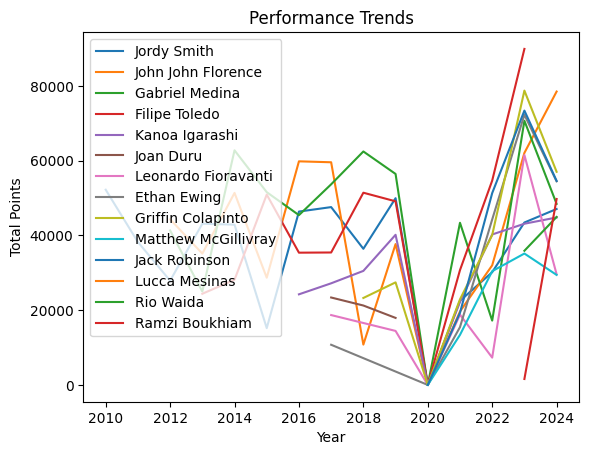

In [292]:
import matplotlib.pyplot as plt

for name in df['Name'].unique():
    athlete_data = df[df['Name'] == name]
    plt.plot(athlete_data['Year'], athlete_data['Total Points'], label=name)

plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Performance Trends')
plt.legend()
plt.show()

# df['Experience'] = df.groupby('Name').cumcount() + 1


In [266]:
df.loc[df['SHISEIDO Tahiti Pro presented by Outerknown'] > 0, 'Total Points'] += df['SHISEIDO Tahiti Pro presented by Outerknown']
df.loc[df['SHISEIDO Tahiti Pro'] > 0, 'Total Points'] += df['SHISEIDO Tahiti Pro']*0.5
print(df.loc[df['Year'] == 2024])

    Rank                 Name  Total Points  Year Quiksilver Pro Gold Coast  \
504    1   John John Florence       39265.0  2024                       NaN   
505    2    Griffin Colapinto       28525.0  2024                       NaN   
506    3        Jack Robinson       27310.0  2024                       NaN   
507    4          Ethan Ewing       27250.0  2024                       NaN   
509    6          Jordy Smith       23545.0  2024                       NaN   
513   10       Kanoa Igarashi       22410.0  2024                       NaN   
514   11       Ramzi Boukhiam       24885.0  2024                       NaN   
515   12       Gabriel Medina       24235.0  2024                       NaN   
516   13            Rio Waida       22480.0  2024                       NaN   
523   20  Leonardo Fioravanti       14810.0  2024                       NaN   
524   21  Matthew McGillivray       14725.0  2024                       NaN   

    Rip Curl Pro Bells Beach Santa Catarina Pro Bil

In [267]:
df.loc[df['Year'] == 2024, 'Total Points'] *= 2
df.loc[df['Year'] == 2023, 'Total Points'] *= 1.5

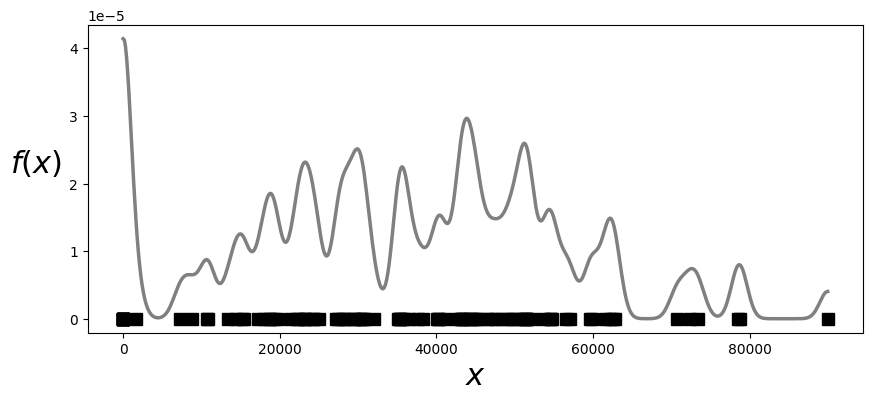

In [283]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity

dataset = df['Total Points'].values[:, np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=1000).fit(dataset)

# x-value range for plotting KDE
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# compute the log-likelihood of each sample
log_density = kde.score_samples(x_range[:, np.newaxis])

plt.figure(figsize=(10,4))
# put labels over datapoints
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.07],
                 horizontalalignment='center',
                 fontsize=18)

# draw KDE curve
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(dataset, np.zeros_like(dataset) , 's', 
         markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

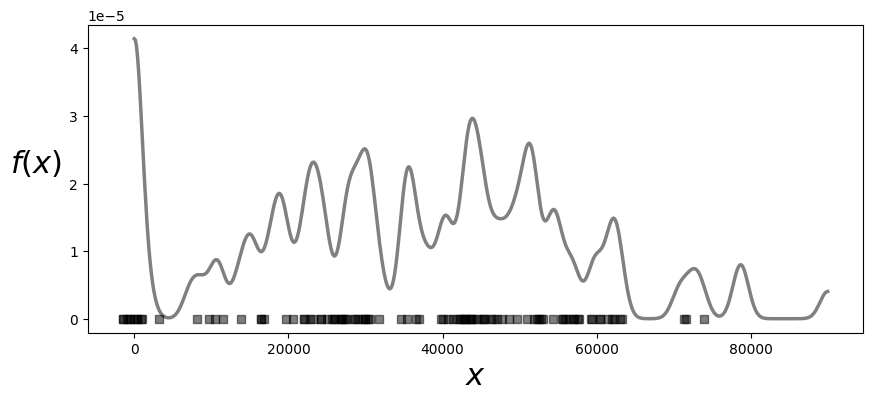

In [284]:
# Generate random samples from the model
synthetic_data = kde.sample(100)

plt.figure(figsize=(10,4))

# draw KDE curve
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# draw boxes representing datapoints
plt.plot(synthetic_data, np.zeros_like(synthetic_data) , 's', 
         markersize=6, color='black', alpha=0.5)
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

In [286]:
def kde_simulation(df, kde, num_simulations=1000):
    results = []

    for _ in range(num_simulations):
        simulated_points = kde.sample(len(df)).flatten()
        
        simulated_data = []
        for i, name in enumerate(df['Name']):
            simulated_data.append((name, simulated_points[i]))
        
        simulated_data.sort(key=lambda x: x[1], reverse=True)
        top_3 = simulated_data[:3]
        results.append([surfer[0] for surfer in top_3]) 

    results_df = pd.DataFrame(results, columns=['1st', '2nd', '3rd'])
    top_3_counts = results_df.apply(pd.Series.value_counts).fillna(0).reset_index()
    top_3_counts.columns = ['Surfer', '1st', '2nd', '3rd']
    top_3_counts['Total Top 3'] = top_3_counts['1st'] + top_3_counts['2nd'] + top_3_counts['3rd']
    top_3_counts['Top 3 Probability'] = top_3_counts['Total Top 3'] / num_simulations
    
    
    final_top_3 = []

    top_1 = top_3_counts.sort_values(by='1st', ascending=False).iloc[0]
    final_top_3.append((top_1['Surfer'], '1st'))
    
    top_3_counts_filtered = top_3_counts[top_3_counts['Surfer'] != top_1['Surfer']]
    top_2 = top_3_counts_filtered.sort_values(by='2nd', ascending=False).iloc[0]
    final_top_3.append((top_2['Surfer'], '2nd'))
    
    top_3_counts_filtered = top_3_counts_filtered[top_3_counts_filtered['Surfer'] != top_2['Surfer']]
    top_3 = top_3_counts_filtered.sort_values(by='3rd', ascending=False).iloc[0]
    final_top_3.append((top_3['Surfer'], '3rd'))

    return pd.DataFrame(final_top_3, columns=['Surfer', 'Rank'])


simulation_results = kde_simulation(df, kde)
print(simulation_results)


               Surfer Rank
0  John John Florence  1st
1         Jordy Smith  2nd
2      Gabriel Medina  3rd


In [287]:
import requests
from bs4 import BeautifulSoup

opening_round_url = 'https://www.worldsurfleague.com/events/2024/ct/201/shiseido-tahiti-pro/results?roundId=23691'

response = requests.get(opening_round_url)
html_content = response.content


with open('opening_round.html', 'wb') as file:
    file.write(html_content)

print("HTML content saved for analysis.")

HTML content saved for analysis.


In [288]:

with open('opening_round.html', 'r', encoding='utf-8') as file:
    html_content = file.read()


soup = BeautifulSoup(html_content, 'html.parser')


print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7 ]><html lang="en" class="ie ie6 lte10 lte9 lte8 lte7 page-type--not-index page-type--joint-events page-sub-type--joint-event-results"><![endif]-->
<!--[if IE 7 ]><html lang="en" class="ie ie7 lte10 lte9 lte8 lte7 gt6 page-type--not-index page-type--joint-events page-sub-type--joint-event-results"><![endif]-->
<!--[if IE 8 ]><html lang="en" class="ie ie8 lte10 lte9 lte8 gt6 gt7 page-type--not-index page-type--joint-events page-sub-type--joint-event-results"><![endif]-->
<!--[if IE 9 ]><html lang="en" class="ie ie9 lte10 lte9 gt6 gt7 gt8 page-type--not-index page-type--joint-events page-sub-type--joint-event-results"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="page-type--not-index page-type--joint-events page-sub-type--joint-event-results" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
  <title>
   Results - SHISEIDO Tahiti Pro 2024 | W

In [291]:
def extract_opening_round_data(soup):
    heats = soup.find_all('div', class_='post-event-watch-heat-grid__heat')
    data = []

    for heat in heats:
        heat_number = heat.find('span', class_='heat-name').text.strip()
        surfers = heat.find_all('div', class_='hot-heat-athlete')

        for surfer in surfers:
            name_div = surfer.find('div', class_='avatar-text-primary')
            if name_div:
                name_elements = name_div.text.strip().split()
                if len(name_elements) > 1:
                    # name = name_elements[2] + " " + name_elements[1]  # get the second element
                    name = ""
                    for i in range(2,len(name_elements)):
                        if(i == len(name_elements)-2):
                            name+= name_elements[i]
                            break
                        name += name_elements[i] + " "

                    # name = name_elements
                else:
                    name = "Unknown"
            else:
                name = "Unknown"
            country_div = surfer.find('span', class_='athlete-country-flag')
            country = country_div['title'] if country_div else "Unknown"
            data.append({'Heat': heat_number, 'Name': name, 'Country': country})

    return pd.DataFrame(data)

opening_round_data = extract_opening_round_data(soup)
print(opening_round_data)

      Heat                 Name           Country
0   Heat 1          Ethan Ewing         Australia
1   Heat 1           Seth Moniz            Hawaii
2   Heat 1       Connor O'Leary             Japan
3   Heat 2   John John Florence            Hawaii
4   Heat 2            Rio Waida         Indonesia
5   Heat 2            Yago Dora            Brazil
6   Heat 3        Jack Robinson         Australia
7   Heat 3       Ramzi Boukhiam           Morocco
8   Heat 3         Kelly Slater     United States
9   Heat 4    Griffin Colapinto     United States
10  Heat 4       Italo Ferreira            Brazil
11  Heat 4       Mihimana Braye  French Polynesia
12  Heat 5          Jordy Smith      South Africa
13  Heat 5     Crosby Colapinto     United States
14  Heat 5  Matthew McGillivray      South Africa
15  Heat 6        Jake Marshall     United States
16  Heat 6   Imaikalani deVault            Hawaii
17  Heat 6       Gabriel Medina            Brazil
18  Heat 7        Barron Mamiya            Hawaii
